In [1]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
import ipywidgets as widgets

In [2]:
# DEFINING FITTING FUNCTIONS USED FOR THIS LAB ---------------------------------------
def proportionality(x,a):
    return a*x

def linear(x,a,b):
    return a*x + b

def linearODR(B,x):
    return B[0]*x + B[1]

def LinearPlot(xdata,ydata,error_y,error_x,a,b,title,function,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.title(title, fontsize = 18)
    plt.legend(prop={'size': 15}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def LinearPlotODR(xdata,ydata,error_y,error_x,a,b,title,function,output,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(output.beta, xdata),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.title(title, fontsize = 18)
    plt.legend(prop={'size': 12}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")

In [5]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1scQGL11UvFQby8DDEdlZumkBdU-vqa2ZZyCU8bGhbN8'
workSheetName = 'Experiment'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df
https://docs.google.com/spreadsheets/d/17H9-jFJKk_K1OKo1Tb_DOF_XxemwUpaan1Le9xGHFqA/edit#gid=1681969290

,Current (A),Voltage (V),Diameter (cm),Diameter (m),D_Error (m),$\sqrt{V}/I$,V_Error (V),I_Error (A),VI_Error
0,1.00,150.5,10.3,0.103,0.001,12.267844,0.1,0.1,1.226791
1,1.50,150.5,7.4,0.074,0.001,8.178563,0.1,0.1,0.545244
2,2.00,150.0,5.7,0.057,0.001,6.123724,0.1,0.1,0.306193
3,2.50,150.3,4.8,0.048,0.001,4.903876,0.1,0.1,0.196162
4,3.00,150.3,4.2,0.042,0.001,4.086563,0.1,0.1,0.136226
5,1.00,200.7,13.5,0.135,0.001,14.166863,0.1,0.1,1.416691
6,1.50,200.0,8.5,0.085,0.001,9.428090,0.1,0.1,0.628544
7,2.00,200.0,6.5,0.065,0.001,7.071068,0.1,0.1,0.353558
8,2.50,200.5,5.4,0.054,0.001,5.663921,0.1,0.1,0.226561
9,3.00,200.5,4.5,0.045,0.001,4.719934,0.1,0.1,0.157336


In [6]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_y = widgets.Dropdown(options=filenames,
                                description='Error_Y',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error_x = widgets.Dropdown(options=filenames,
                                description='Error_X',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error_y, drop_down_error_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', 'Current (A)', 'V…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', 'Current (A)', 'V…

Dropdown(description='Error_Y', layout=Layout(width='max-content'), options=('Select Column', 'Current (A)', '…

Dropdown(description='Error_X', layout=Layout(width='max-content'), options=('Select Column', 'Current (A)', '…

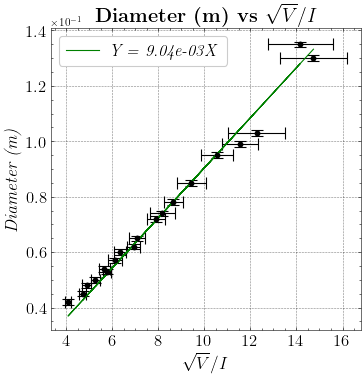

In [23]:
# FITTING THE DATA USING A LINEAR RELATIONSHIP WITH UNCERTAINTY IN Y ---------------------------------------
xdata, ydata, error_y, error_x = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error_y.value], df[drop_down_error_x.value]
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata, sigma = error_y)
perr = np.sqrt(np.diag(covariance))

#Calculate the error on the fits from the covariacne matrix
slope = parameters[0]
slope_error = perr[0]

if parameters.shape[0] > 1: 
    b = parameters[1] 
    b_error = perr[1]
else:
    b = 0
    b_error = 0

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{' + drop_down_y.value + ' vs ' + drop_down_x.value + '}$'
LinearPlot(xdata,ydata,error_y,error_x,slope,b,title,proportionality,'green',drop_down_x.value,drop_down_y.value)

In [8]:
print('slope_error = ' + "{:.4e}".format(slope_error))
print('b_error = ' + "{:.4e}".format(b_error))

slope_error = 9.2367e-05
b_error = 0.0000e+00


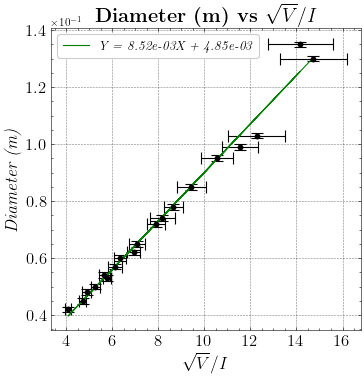

In [27]:
# LINEAR REGRESSION USSING UNCERTAINTY IN X AND Y
from scipy.odr import ODR, Model, Data, RealData
model = Model(linearODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1,0])
odr.set_job(fit_type=2)
output = odr.run()
a,b = output.beta[0], output.beta[1]

#Calculate the error on the fits from the std matrix
slope = output.beta[0]
slope_error = output.sd_beta[0]

#plt.plot(xdata, linearPlot(output.beta, xdata))
LinearPlotODR(xdata, ydata, error_y, error_x, a,b, title, linearODR, output,'green',drop_down_x.value,drop_down_y.value)

In [10]:
print('slope_error = ' + "{:.4e}".format(slope_error))

slope_error = 2.2810e-04


## DETERMING CONSTANT $C$ ------------------

In [24]:
# EXPERIMENTAL DETAILS
from scipy.constants import mu_0
N = 130 # Number of turns per coil
R_0 = 0.15 # Separation between coils (m)
A_exp = 0.0008525779649118258 # From PreLab
A_error = 3.533144298959403e-06

In [25]:
C = 2*np.sqrt(2)/A_exp
C_error = (2*np.sqrt(2)/A_exp**2)*A_error
C_theor = (2*np.sqrt(2)/(mu_0*N))*((5/4)**(3/2))*R_0
porc_error = 100*abs(C-C_theor)/C_theor
print("C = ", C, " ± ", C_error, "A/T")
print("C_theorical = ", C_theor)
print("C % error = ", porc_error, "%")

C =  3317.4996787991213  ±  13.747956854785688 A/T
C_theorical =  3629.5104863285364
C % error =  8.596498307545392 %


## DETERMING RATIO $e/m$ ------------------

In [13]:
from scipy.constants import e, m_e

In [26]:
# DETERMING THE THEORETICAL SLOPE USING PROPORTIONAL REGRESSION WITH Y UNCERTAINTY
C = 2*np.sqrt(2)/A_exp
em_ratio_exp = (slope/C)**(-2)
units = 'C/kg'
em_ratio_theor = e/m_e
exp_error = np.sqrt((2*slope**(-3)/C*slope_error)**2 + (2*slope**(-2)*C*C_error)**2)
print('Theoretical e/m ratio: ' + "{:.4e}".format(em_ratio_theor) + ' ' + units)
print('Experimental e/m ratio: ' + "{:.4e}".format(em_ratio_exp) + ' ± ' + "{:.4e}".format(exp_error) + ' ' + units)

# DETERMING THE %ERROR
error = abs((em_ratio_exp-em_ratio_theor)/em_ratio_theor)*100
print("Percentage error: ", error, "%")

Theoretical e/m ratio: 1.7588e+11 C/kg
Experimental e/m ratio: 1.3470e+11 ± 1.1164e+09 C/kg
Percentage error:  23.416176522052613 %


In [29]:
# DETERMING THE THEORETICAL SLOPE USING LINEAR REGRESSION WITH X AND Y UNCERTAINTY
C = 2*np.sqrt(2)/A_exp
em_ratio_exp = (slope/C)**(-2)
units = 'C/kg'
em_ratio_theor = e/m_e
exp_error = np.sqrt((2*slope**(-3)/C*slope_error)**2 + (2*slope**(-2)*C*C_error)**2)
print('Theoretical e/m ratio: ' + "{:.4e}".format(em_ratio_theor) + ' ' + units)
print('Experimental e/m ratio: ' + "{:.4e}".format(em_ratio_exp) + ' ± ' + "{:.4e}".format(exp_error) + ' ' + units)

# DETERMING THE %ERROR
error = abs((em_ratio_exp-em_ratio_theor)/em_ratio_theor)*100
print("Percentage error: ", error, "%")

Theoretical e/m ratio: 1.7588e+11 C/kg
Experimental e/m ratio: 1.5167e+11 ± 1.2570e+09 C/kg
Percentage error:  13.768238084595916 %
